# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [3]:
df = pd.read_csv('CARRO_CLIENTES.csv')

In [4]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
# VErificando o tipo de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
# Removendo a coluna 'User ID' que não é relevante para a análise
df.drop(columns=['User ID'], inplace=True)

# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [8]:
# Transformando a coluna Gender
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

<Axes: >

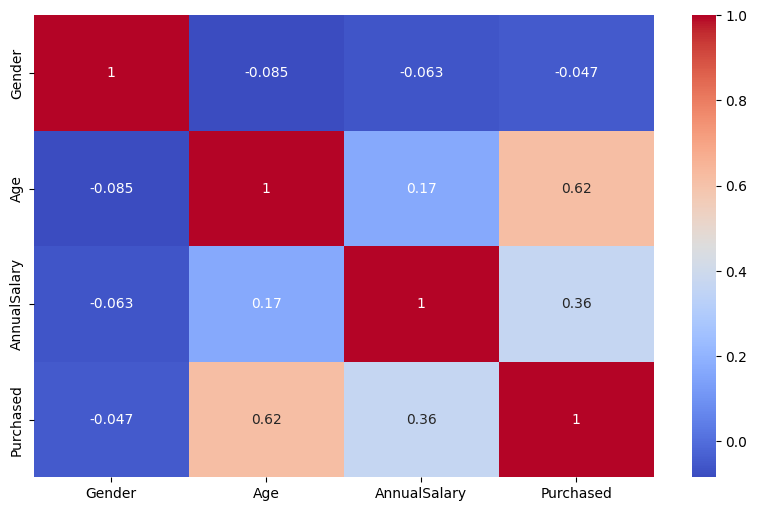

In [13]:
# Plotnado a matriz de correlação
correlation_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Age apresenta uma correlação moderada com a variável alvo, provavelmente porque pessoas tendem a preciasar de carros e ter condições para comprá-los conforme ficam mais velhas.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [ ]:
# Separando os conjuntos de treino e teste
X = df.drop('Purchased',axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [18]:
# Treinando o modelo XGBoost

model_xgb = xgb.XGBClassifier(early_stopping_rounds=10, n_estimators=500, max_depth=10, reg_lambda=1)
model_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=1)


[0]	validation_0-logloss:0.50997
[1]	validation_0-logloss:0.41161
[2]	validation_0-logloss:0.34211
[3]	validation_0-logloss:0.30208
[4]	validation_0-logloss:0.27357
[5]	validation_0-logloss:0.25193
[6]	validation_0-logloss:0.24157
[7]	validation_0-logloss:0.23558
[8]	validation_0-logloss:0.23076
[9]	validation_0-logloss:0.22371
[10]	validation_0-logloss:0.21911
[11]	validation_0-logloss:0.21454
[12]	validation_0-logloss:0.21519
[13]	validation_0-logloss:0.21568
[14]	validation_0-logloss:0.21731
[15]	validation_0-logloss:0.22021
[16]	validation_0-logloss:0.22327
[17]	validation_0-logloss:0.22237
[18]	validation_0-logloss:0.22466
[19]	validation_0-logloss:0.22847
[20]	validation_0-logloss:0.22936
[21]	validation_0-logloss:0.22758


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,None


# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [19]:
# Realizando previsões e trazendo a probabilidade
y_pred = model_xgb.predict(X_test)
y_pred_proba = model_xgb.predict_proba(X_test)

# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

In [29]:
# Transformando as probabilidades e avaliando o modelo
y_proba_final = np.where(y_pred_proba[:,1] > 0.5, 1, 0)
print('Resultados do Modelo XGBoost\n', classification_report(y_test, y_proba_final))
print('\n\nMatriz de Confusão\n', confusion_matrix(y_test, y_proba_final))

Resultados do Modelo XGBoost
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       112
           1       0.93      0.86      0.89        88

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



Matriz de Confusão
 [[106   6]
 [ 12  76]]


O modelo se saiu muito bem, mas o valor de recall para a classe 1 ficou um pouco abaixo do esperado. Observando a matriz de confusão, é possível entender o motivo: o modelo acabou gerando mais falsos negativos do que falsos positivos.

Vale destacar que, por se tratar de uma base de dados pequena, qualquer pequena variação nas previsões impacta bastante as métricas finais. Com uma quantidade maior de dados, o modelo provavelmente conseguiria se ajustar melhor aos padrões e apresentar resultados ainda mais satisfatórios.

# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?

In [ ]:
# Lista de features por importância
importances = model_xgb.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame(list(importances.items()), columns=['Feature', 'Importance'])
importance_df['Importance'] = importance_df['Importance'].astype(float)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


        Feature  Importance
1           Age    3.548472
2  AnnualSalary    2.235311
0        Gender    0.622442


Neste caso, as duas features com maior correlação acabaram sendo as mais importantes: Age (0,62) e AnnualSalary (0,17).

No entanto, é importante lembrar que nem sempre isso acontece, pois o modelo considera relações complexas entre as variáveis, e não apenas a correlação direta com a variável alvo. Isso reforça a ideia de que “correlação não significa causalidade”, ou seja, uma relação forte entre duas variáveis não quer dizer que uma causa a outra.